<a href="https://colab.research.google.com/github/YazMRRS/FisicaComputacional1/blob/master/Actividad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Importamos las bibliotecas 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Matplotlib mostrará los resultados en la Notebook de Jupyter
%matplotlib inline 

In [10]:
#En esta nueva Jupyter Notebook, en una celda vamos a concentrar todas las operaciones de transformación del dataframe original df_dist

#Tomar la dirección URL del archivo en formato 'raw' 
url = 'https://raw.githubusercontent.com/YazMRRS/FisicaComputacional1/master/Actividad1/26086Diario.txt'

#Definimos los nombres de las columnas 
#El archivo tiene códigos ASCII extendido (Español), enconding='cp1251' Windows (Europa Occidental)
#El separador de datos es de uno o más espacios, sep='\s+'
#Se brincará los primeros 19 renglones y el último, afirmamos que no hay encabezado
#Se procesan los datos utilizando Python, engine='python'
my_cols = ['FECHA', 'PRECIP', 'EVAP', 'TMAX', 'TMIN']
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

#Hacemos una copia de trabajo y presevarmos el dataframe original 
df_work0 = df_dist.copy()

#Reemplezamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)

#Deseamos convirtir los valores de las variables ambientales a núm. flotantes
cols_list = ['PRECIP', 'EVAP', 'TMAX', 'TMIN']
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce')

#Volvemos a hacer una pausa y definimos una nueva dataframe por si hay que regresarse. 
df_work2 = df_work1.copy()

#Pandas tiene la función pd.to_datatime que convierte una cadena en tipo datetime64[ns]
#Intentamos a ver si Python reconoce el formato en nuestro caso.
#Agregamos la opción de que el primer dato es el día (dayfirst=True)
df_work2['FECHA']=pd.to_datetime(df_work2['FECHA'], dayfirst=True).copy()

#Buscamos ahor añadir dos columnas adicionales: df['AÑO'], df['Mes']
#Usaremos la función .dt.year y .dt.month para extraer el año y mes de la fecha
df_work2['AÑO'] = df_work2['FECHA'].dt.year
df_work2['MES'] = df_work2['FECHA'].dt.month

#Definimos un nuevo DataFrame para el análisis de los datos meteológicos. 
#Será nuestro nuevo punto de partida. 
df_datos = df_work2.copy()
df_datos.info()
print(df_datos.head())
print(df_datos.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19169 entries, 0 to 19168
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   FECHA   19169 non-null  datetime64[ns]
 1   PRECIP  19155 non-null  float64       
 2   EVAP    4123 non-null   float64       
 3   TMAX    19062 non-null  float64       
 4   TMIN    19067 non-null  float64       
 5   AÑO     19169 non-null  int64         
 6   MES     19169 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 1.0 MB
       FECHA  PRECIP  EVAP  TMAX  TMIN   AÑO  MES
0 1924-08-05     0.0   NaN  42.0  29.0  1924    8
1 1924-08-06     0.0   NaN  42.3  24.8  1924    8
2 1924-08-07     0.0   NaN  42.0  25.5  1924    8
3 1924-08-08     0.0   NaN  38.3  26.5  1924    8
4 1924-08-09     0.0   NaN  42.5  26.4  1924    8
           FECHA  PRECIP  EVAP  TMAX  TMIN   AÑO  MES
19164 1987-12-27     0.0   NaN  14.0  -2.5  1987   12
19165 1987-12-28   

In [11]:
#Eliminaremos la columna de Mes (numérico) y crearemos una nueva de Mes (caracteres)
df_datos.drop('MES', axis=1, inplace=True)
df_datos['MES'] = df_datos['FECHA'].dt.strftime('%b')
df_datos.info()
print(df_datos.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19169 entries, 0 to 19168
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   FECHA   19169 non-null  datetime64[ns]
 1   PRECIP  19155 non-null  float64       
 2   EVAP    4123 non-null   float64       
 3   TMAX    19062 non-null  float64       
 4   TMIN    19067 non-null  float64       
 5   AÑO     19169 non-null  int64         
 6   MES     19169 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.0+ MB
       FECHA  PRECIP  EVAP  TMAX  TMIN   AÑO  MES
0 1924-08-05     0.0   NaN  42.0  29.0  1924  Aug
1 1924-08-06     0.0   NaN  42.3  24.8  1924  Aug
2 1924-08-07     0.0   NaN  42.0  25.5  1924  Aug
3 1924-08-08     0.0   NaN  38.3  26.5  1924  Aug
4 1924-08-09     0.0   NaN  42.5  26.4  1924  Aug


**Actividad 1.** Resume en una sola celda todas las funciones que aplicaste en DataFrame inicial y que concluya con la creación de un nuevo DataFrame para continuar nuestro trabajo. 

**Visualización de datos.**
Dentro de las acciones que requerimos realizar para comprender un conjunto de datos es visualizarlos con ayuda de las bibliotecas de Phyton: Matplotlib, Seaborn y otras. 


---
Se puede visualizar las características de variables numéricas mediante:


*   Histogramas
*   Distribuciones de Probabilidad
*   Gráficas de caja (BoxPlots)

<function matplotlib.pyplot.show>

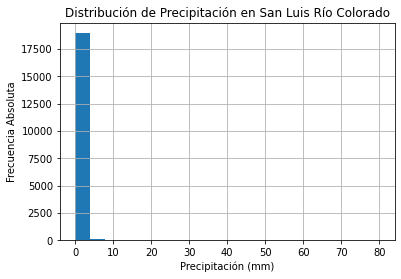

In [12]:
#Uso de la biblioteca Matplotlib

#Elaboración de Histrogramas
#Utilizamos Matpltlib.Pyplot, abreviado como plt
#Nota: Usaremos la notación equivalente de columnas, df['Variable']=df.Variable

plt.hist(df_datos.PRECIP, bins=20)
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frecuencia Absoluta')
plt.title('Distribución de Precipitación en San Luis Río Colorado')
plt.grid()
plt.show

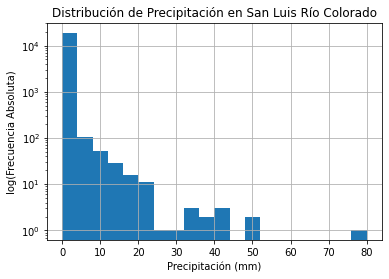

In [13]:
#Repetimos la gráfica utilizando escala logarítmica en el eje y para mejor visualización
plt.hist(df_datos.PRECIP, bins=20)
plt.yscale('log')
plt.xlabel('Precipitación (mm)')
plt.ylabel('log(Frecuencia Absoluta)')
plt.title('Distribución de Precipitación en San Luis Río Colorado')
plt.grid()
plt.show()

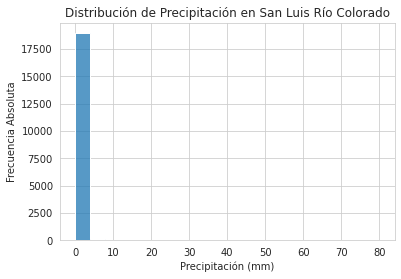

In [14]:
#Uso de la biblioteca Seaborn 
#Gráficas de histogramas: sns.histplot()

#Misma gráfica utilizando la biblioteca Seaborn 
sns.set_style("whitegrid")
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frecuencia Absoluta')
plt.title('Distribución de Precipitación en San Luis Río Colorado')
sns.histplot(data=df_datos, x='PRECIP', bins=20)


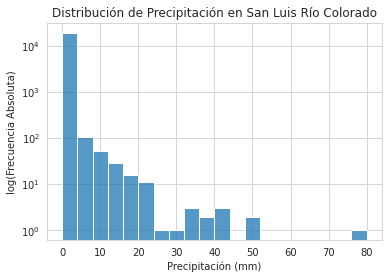

In [15]:
#Repetimos la gráfica utilizando escala logarítmica sólo en el eje y
sns.set_style("whitegrid")
plt.xlabel('Precipitación (mm)')
plt.ylabel('log(Frecuencia Absoluta)')
plt.title('Distribución de Precipitación en San Luis Río Colorado')
sns. histplot(data=df_datos, x='PRECIP', bins=20, log_scale=(False,True))

**Actividad 2.**
Crear Histogramas de las variables de Precipitación, Evaporación, Temperaturas Máxima y Mínima de el conjunto de datos que se están analizando. 
Complementar en su caso con las gráficas de la función de densidad de probabilidad correspondiente. 

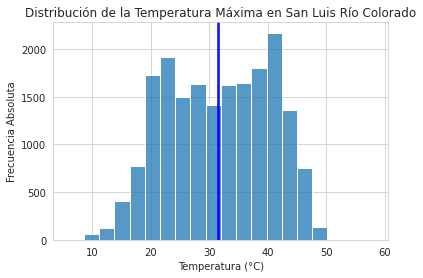

In [16]:
#Gráfica de la Temperatura Máxima 
sns.set_style("whitegrid")

#Definimos las cantidades específicas: Promedio y Mediana
TMED = df_datos.TMAX.median()
TPROM = df_datos.TMAX.mean()
sns.histplot(data=df_datos, x='TMAX', bins=20)

#Líneas verticales ubicadas en la mediana y promedio
plt.axvline(x=TMED, color='b', label='m')
plt.axvline(x=TPROM, color='b', label='x')

plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia Absoluta')
plt.title('Distribución de la Temperatura Máxima en San Luis Río Colorado')

plt.show()

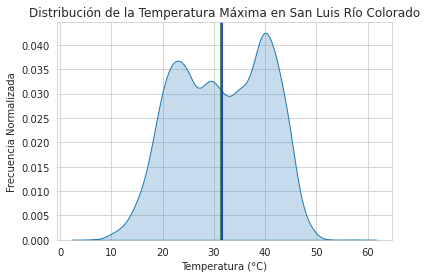

In [17]:
#Gráfica de función de distribución de probabilidad

#Gráfica de KDE (Kernel Density Estimate)
#Gráfica de la función de densidad de probabilidad
sns.set_style("whitegrid")

sns.kdeplot(df_datos.TMAX, fill=True);
plt.axvline(TMED, color='b');
plt.axvline(TPROM, color='g');

plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en San Luis Río Colorado')

plt.show()

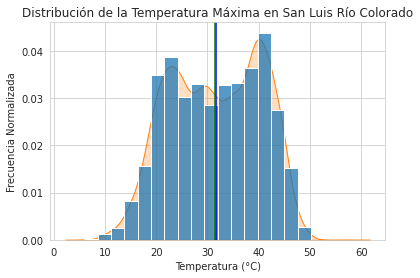

In [18]:
#Sobreponemos ambas
sns.set_style("whitegrid")

sns.histplot(data=df_datos, x='TMAX', bins=20, stat='density');
sns.kdeplot(df_datos.TMAX, fill=True);

plt.axvline(TMED, color='b');
plt.axvline(TPROM, color='g');

plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en San Luis Río Colorado')

plt.show()

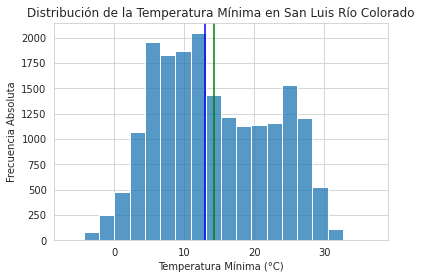

In [19]:
#Gráfica de la Temperatura Mínima
sns.set_style("whitegrid")

#Definimos las cantidades específicas: promedio y mediana
TMED = df_datos.TMIN.median()
TPROM = df_datos.TMIN.mean()

sns.histplot(data=df_datos, x='TMIN', bins=20);
plt.axvline(TMED, color='b');
plt.axvline(TPROM, color='g');

plt.xlabel('Temperatura Mínima (°C)')
plt.ylabel('Frecuencia Absoluta')
plt.title('Distribución de la Temperatura Mínima en San Luis Río Colorado')

plt.show()

In [20]:
print(TMED)
print(TPROM)

13.0
14.308527822940086


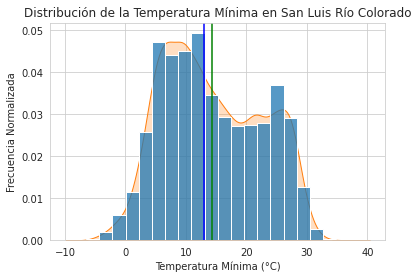

In [22]:
#Gráfica de la Temperatura Mínima y KDE
sns.set_style("whitegrid")

#Definimos las cantidades específicas: promedio y mediana
TMED = df_datos.TMIN.median()
TPROM = df_datos.TMIN.mean()

sns.histplot(data=df_datos, x='TMIN', bins=20, stat='density')
sns.kdeplot(df_datos.TMIN, fill=True);

plt.axvline(TMED, color='b');
plt.axvline(TPROM, color='g');

plt.xlabel('Temperatura Mínima (°C)')
plt.ylabel('Frecuencia Normalizada')
plt.title('Distribución de la Temperatura Mínima en San Luis Río Colorado')

plt.show()

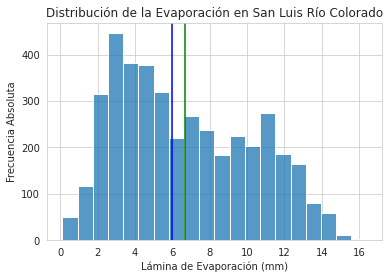

In [30]:
#Gráfica de la Evaporación 
sns.set_style("whitegrid")

#Definimos las cantidades específicas: promedio y mediana
EV_MED = df_datos.EVAP.median()
EV_PROM = df_datos.EVAP.mean()
sns.histplot(data=df_datos, x='EVAP', bins=20);

#Líneas verticales ubicadas en la mediana y promedio 
plt.axvline(x = EV_MED, color='b', label='m')
plt.axvline(x=EV_PROM, color='g', label='x')

plt.xlabel('Lámina de Evaporación (mm)')
plt.ylabel('Frecuencia Absoluta')
plt.title('Distribución de la Evaporación en San Luis Río Colorado')

plt.show()

**Actividad 3.**
Crear las gráficas de cajas para la evaporación, temperaturas máxima y mínima.

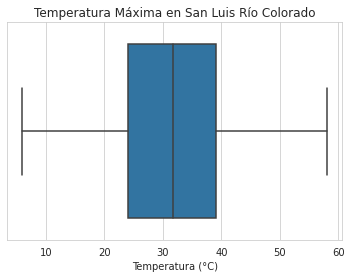

In [28]:
#Gráficas de Cajas (BoxPlots)

#Gráfica de cajas utilizando la biblioteca Seaborn
sns.set_style("whitegrid")

sns.boxplot(x=df_datos.TMAX, data=df_datos, orient='h').set(xlabel='Temperatura (°C)',   
                                                                                                               
title='Temperatura Máxima en San Luis Río Colorado');

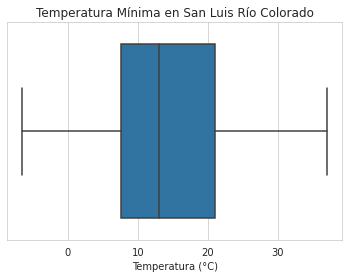

In [29]:
#Gráfica de cajas utilizando la biblioteca Seaborn 
sns.set_style("whitegrid")

sns.boxplot(x=df_datos.TMIN, data=df_datos, orient='h').set(xlabel='Temperatura (°C)',
                                                            
title='Temperatura Mínima en San Luis Río Colorado');                                                      

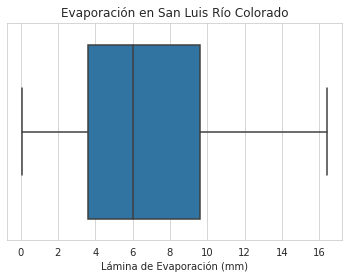

In [32]:
#Gráficas de cajas utilizando la biblioteca Seaborn 
sns.set_style("whitegrid")

sns.boxplot(x=df_datos.EVAP, data=df_datos, orient='h').set(xlabel='Lámina de Evaporación (mm)',
                                                            
title='Evaporación en San Luis Río Colorado');

**Actividad 4.** 
Produzca las gráficas de barras para la precipitación agrupado por años y después por meses.

In [33]:
#Seleccionaremos un conjunto de años de 30 años
df_3 = df_datos[(df_datos['AÑO']>=1924)&(df_datos['AÑO']<1927)]
df_33 = df_datos[(df_datos['AÑO']>=1927)&(df_datos['AÑO']<1957)]
df_63 = df_datos[(df_datos['AÑO']>=1957)&(df_datos['AÑO']<1987)]



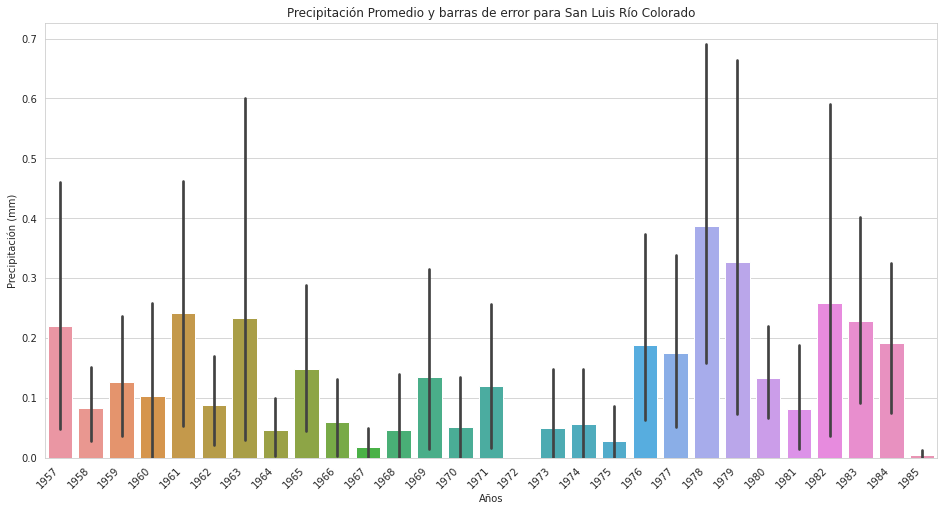

In [37]:
#Gráfica de Precipitación últimos 30 años 
#Agrupada por año
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
g=sns.barplot(x='AÑO', y='PRECIP', data=df_63);

#Rotamos 45° los años en el eje x para mejorar lectura
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para San Luis Río Colorado',)
fontzise=18

plt.show()

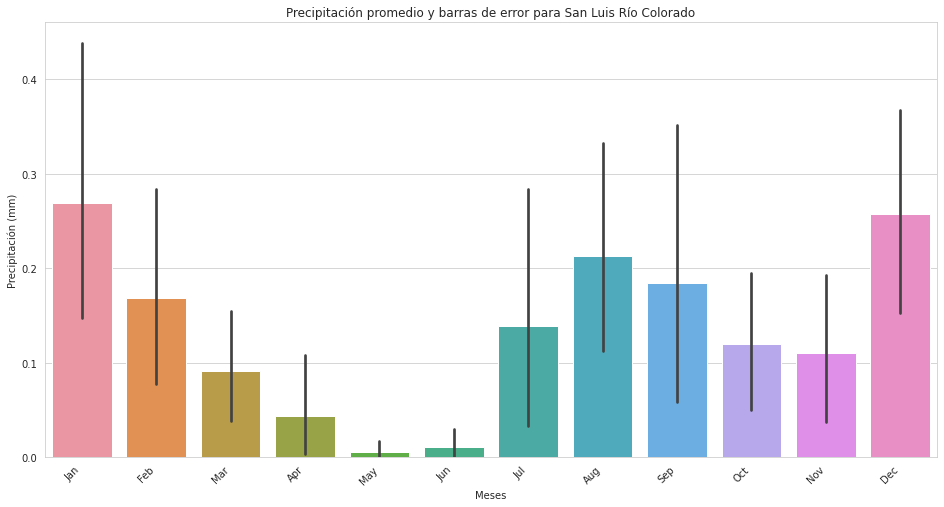

In [38]:
#Gráfica de precipitación últimos 30 años 
#Agrupado por mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
g=sns.barplot(x='MES', y='PRECIP', data=df_63);

#Rotamos 45° los años en el eje x para mejorar lectura
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación promedio y barras de error para San Luis Río Colorado')
fontzise=18

plt.show()

**Actividad 5.**
Cree una colección de los últimos 30 años de datos, utilizando condiciones de filtrado por un rango de años. Crear las gráficas de línea de la precipitación, temperaturas máxima y mínima como funciones del tiempo.

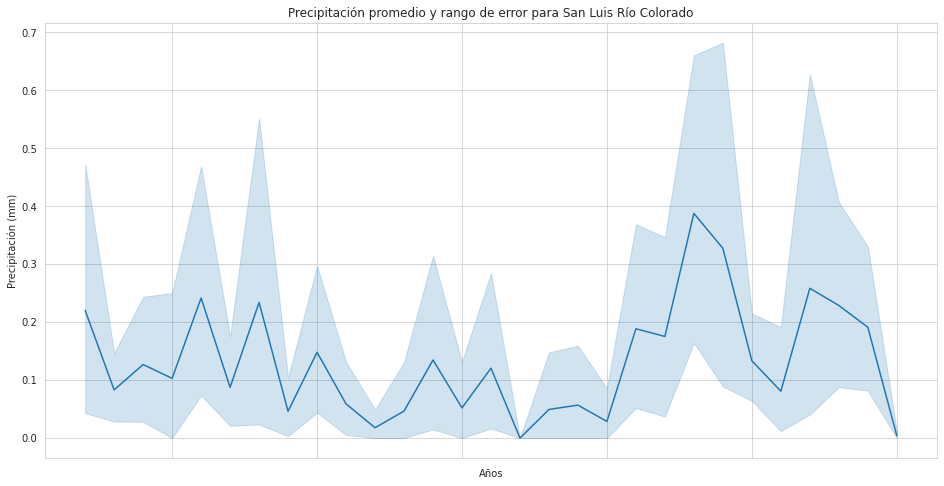

In [39]:
#Gráfica de precipitación últimos 30 años 
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
g=sns.lineplot(x='AÑO', y='PRECIP', data=df_63);

#Rotamos 45° los años en el eje x para mejorar lectura
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación promedio y rango de error para San Luis Río Colorado')
fontzise=18

plt.show()

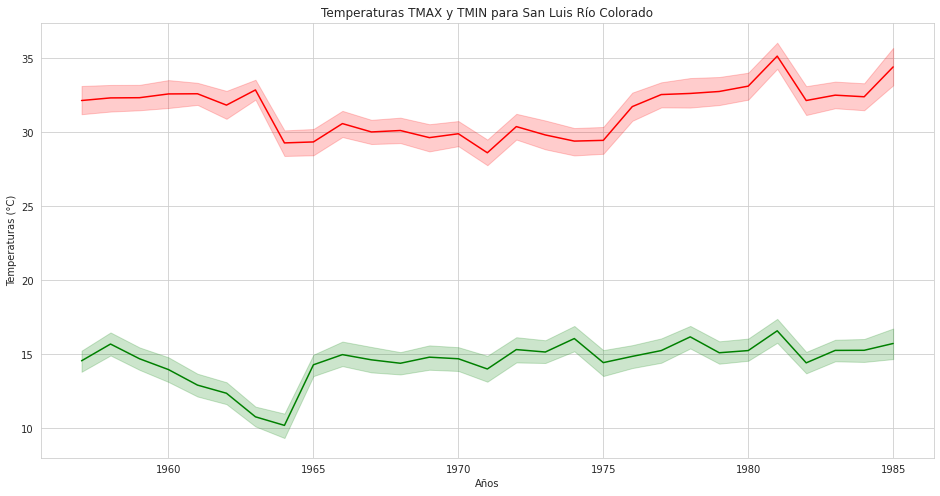

In [42]:
#Gráfica de Temperaturas de últimos 30 años 
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.lineplot(x='AÑO', y='TMAX', data=df_63, color = 'r');
sns.lineplot(x='AÑO', y='TMIN', data=df_63, color = 'g');

plt.xlabel('Años')
plt.ylabel('Temperaturas (°C)')
plt.title('Temperaturas TMAX y TMIN para San Luis Río Colorado')
fontzise=18

plt.show()

**Actividad 6.**
Con el conjunto de 30 años de datos, produzca diagramas de cajas para observar la variabilidad de las temperaturas máxima y mínima y la evaporación, agrupados por mes.

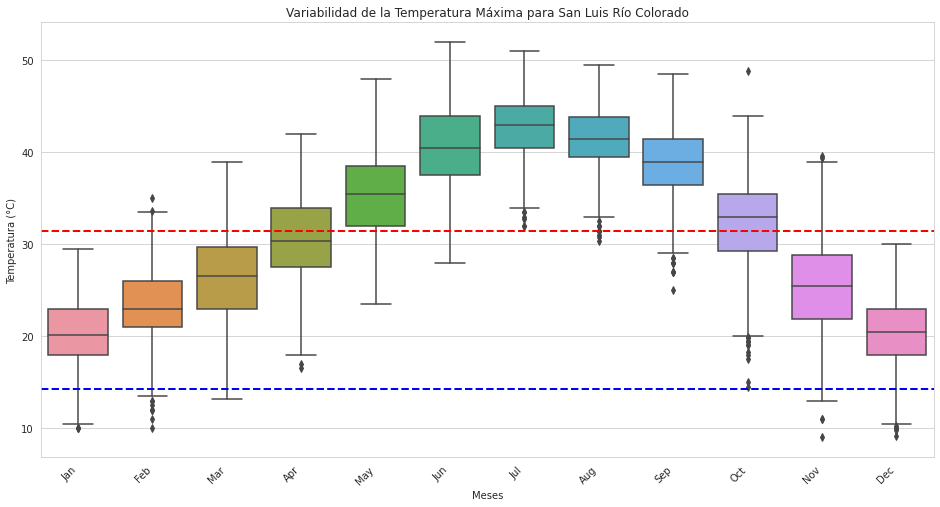

mean(TMAX)= 31.474184240898435
mean(TMIN)= 14.308527822940086
Diff TMAX_AVE-TMIN_AVE= 17.16565641795835


In [43]:
#Gráfica de temperaturas máximas en los últimos 30 años 
#Agrupado por mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

#Promedio de TMAX y TMIN
TMAX_AVE = df_datos.TMAX.mean()
TMIN_AVE = df_datos.TMIN.mean()

#Gráfica de cajas de la temperatura 
g=sns.boxplot(x='MES', y='TMAX', data=df_63);

#Línea de TMAX promedio 
plt.axhline(TMAX_AVE, color='r', linestyle='--', linewidth=2);
plt.axhline(TMIN_AVE, color='b', linestyle='--', linewidth=2);

#Rotamos 45° los años en el eje x para mejorar la lectura
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (°C)')
plt.title('Variabilidad de la Temperatura Máxima para San Luis Río Colorado')
fontzise=18

plt.show()

#Imprimir información de temperaturas
print('mean(TMAX)=', TMAX_AVE)
print('mean(TMIN)=', TMIN_AVE)
print('Diff TMAX_AVE-TMIN_AVE=', (TMAX_AVE-TMIN_AVE))

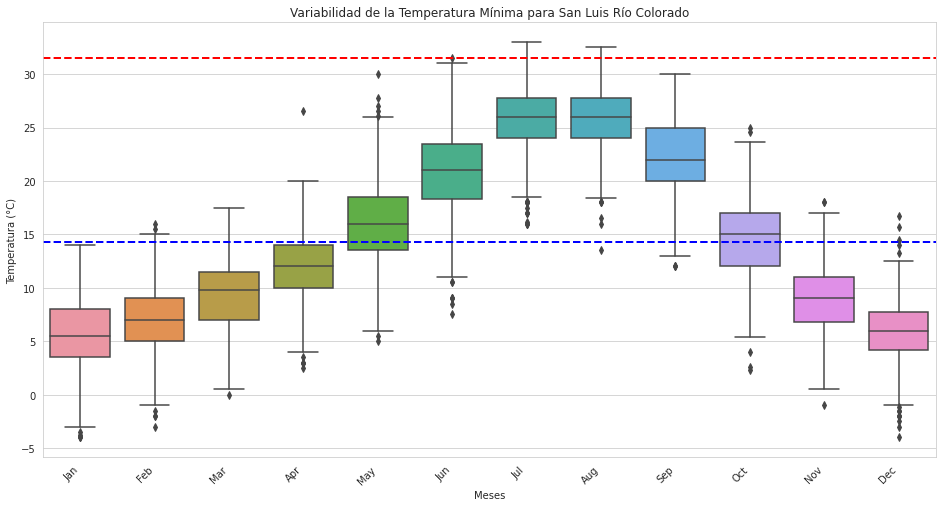

mean(TMAX)= 31.474184240898435
mean(TMIN)= 14.308527822940086
Diff TMAX_AVE-TMIN_AVE= 17.16565641795835


In [44]:
# Gráfica de Temperaturas Mínimas en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de TMAX y TMIN
TMAX_AVE = df_datos.TMAX.mean()
TMIN_AVE = df_datos.TMIN.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='MES', y='TMIN', data=df_63);

# Linea de Tmin promedio 
plt.axhline(TMAX_AVE, color = 'r', linestyle='--', linewidth=2);
plt.axhline(TMIN_AVE, color = 'b', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (°C)')
plt.title('Variabilidad de la Temperatura Mínima para San Luis Río Colorado')
fontsize=18

plt.show()

#Imprimir información de temperaturas
print('mean(TMAX)=', TMAX_AVE)
print('mean(TMIN)=', TMIN_AVE)
print('Diff TMAX_AVE-TMIN_AVE=', (TMAX_AVE-TMIN_AVE))

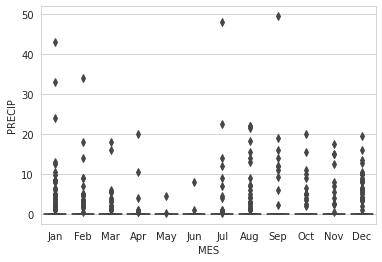

In [46]:
#La gráfica de BoxPlot no brinda información de la precipitación por mes
sns.boxplot(x='MES', y='PRECIP', data=df_63);